In [2]:
library(ggplot2)
library(tidyverse)
library(magrittr)
library(igraph)

In [6]:
df_25 <- read.csv("conf//conf_1000n_2kmin_2.5gamma_40mean.csv")
df_3<-read.csv('conf//conf_1000n_2kmin_3gamma_40mean.csv')
df_28<-read.csv('conf//conf_1000n_2kmin_2.8gamma_40mean.csv')
df_31<-read.csv('conf//conf_1000n_2kmin_3.1gamma_40mean.csv')

df_25 %<>% mutate(gamma='2.5')
df_28 %<>% mutate(gamma='2.8')
df_3 %<>%mutate(gamma='3')
df_31 %<>%mutate(gamma='3.1')

df<-rbind(df_25, df_28, df_3, df_31)

In [7]:
df_3<-read.csv('conf//conf_1000n_2kmin_3gamma_40mean.csv')

# ggplot(df_3, aes(x = alpha, y = g_ratio, col = type)) + geom_point() + geom_line() +
#     geom_linerange(aes(x = alpha, ymin = g_ratio - g_ratio_sd, ymax = g_ratio + g_ratio_sd,
#         col = type), position = position_dodge(0.05)) + ylim(0, 1) + labs(x = expression(paste("Parameter ",
#     alpha)), y='G ratio', col='Attack protocol', title=expression(paste('Configuration model ', gamma,'=3')))+theme_bw()

In [8]:
df_28<-read.csv('conf//conf_1000n_2kmin_2.8gamma_40mean.csv')

# ggplot(df_28, aes(x = alpha, y = g_ratio, col = type)) + geom_point() + geom_line() +
#     geom_linerange(aes(x = alpha, ymin = g_ratio - g_ratio_sd, ymax = g_ratio + g_ratio_sd,
#         col = type), position = position_dodge(0.05)) + ylim(0, 1) + labs(x = expression(paste("Parameter ",
#     alpha)), y='G ratio', col='Attack protocol', title=expression(paste('Configuration model ', gamma,'=3')))+theme_bw()

In [92]:
df_31<-read.csv('conf//conf_1000n_2kmin_3.1gamma_40mean.csv')


In [93]:
df_25 %<>% mutate(gamma='2.5')
df_28 %<>% mutate(gamma='2.8')
df_3 %<>%mutate(gamma='3')
df_31 %<>%mutate(gamma='3.1')

In [94]:
df<-rbind(df_25, df_28, df_3, df_31)

Warning message in geom_line(aes(col = type, shape = gamma), linewidth = 0.7, linetype = 5):
“Ignoring unknown aesthetics: shape”
Warning message:
“Removed 67 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 67 rows containing missing values (`geom_segment()`).”


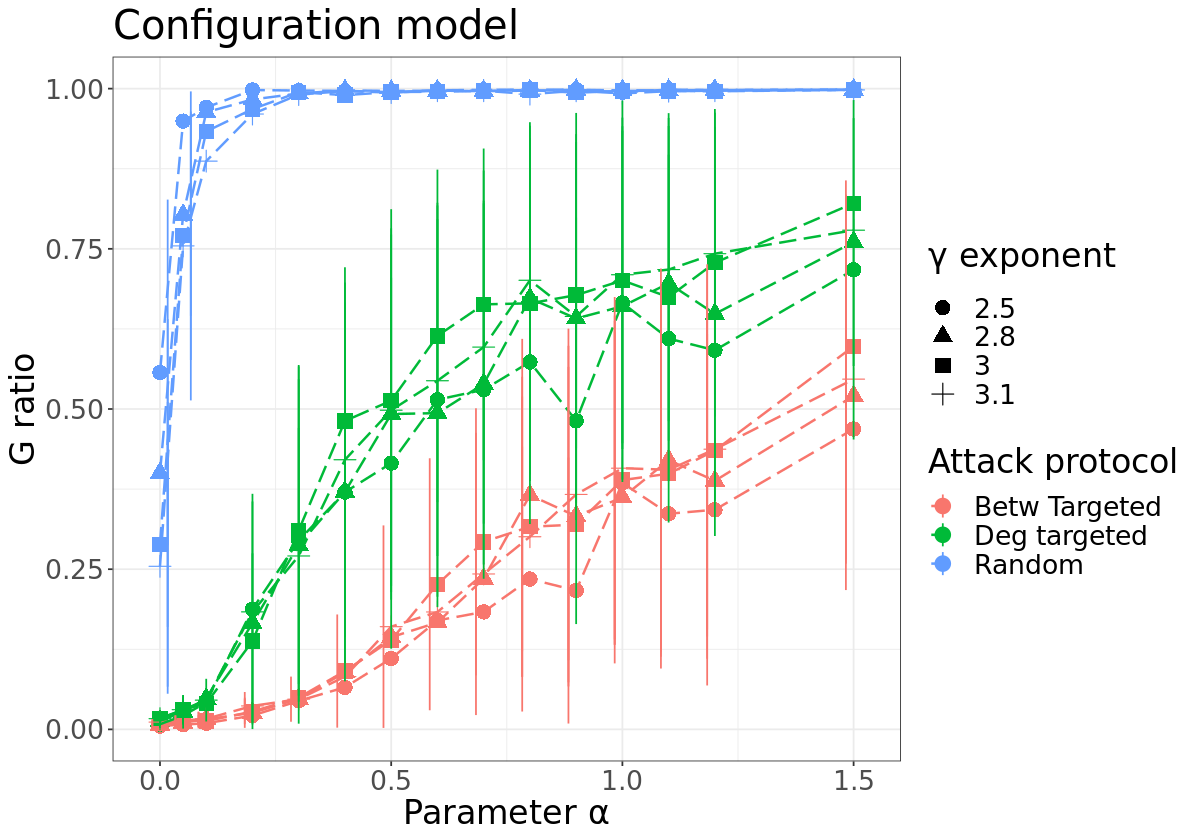

In [95]:
options(repr.plot.width = 10, repr.plot.height = 7)
configuration <- ggplot(df, aes(x = alpha,
                                y = g_ratio)) +
geom_point(aes(col = type,
               shape = gamma),
           size = 4) +
geom_line(aes(col = type,
              shape = gamma),
          linewidth = 0.7,
          linetype=5) +
geom_linerange(aes(ymin = g_ratio - g_ratio_sd,
                   ymax = g_ratio + g_ratio_sd,
                   col = type),
               position = position_dodge(0.05)) +
ylim(0, 1) +
labs(x = expression(paste("Parameter ", alpha)),
     y = "G ratio",
     col = "Attack protocol",
     title = "Configuration model ",
     shape = expression(paste(gamma, " exponent"))) + 
theme_bw() +
theme(text = element_text(size = 20))

configuration

ggsave(configuration, filename = "configuration_model.pdf", width = 10, height = 7,
    scale = 0.75)

# analysis on the kind of network

In [96]:
n <- 1000
k_min <- 2
k_max <- n
gamma <- 3
weights_25 <- (k_min:k_max)^(-2.5)
weights_28 <- (k_min:k_max)^(-2.8)
weights_3 <- (k_min:k_max)^(-3)
weights_31 <- (k_min:k_max)^(-3.1)

degseq <- function(n, k_min, k_max, weights) {
    degs <- sample(c(k_min:k_max), size = n, replace = TRUE, prob = weights)
    if (sum(degs) %% 2 == 1) {
        degs[1] <- degs[1] + 1
    }
    g <- igraph::sample_degseq(out.deg = degs, method = "vl")
    return(g)
}

dd_25 <- vector()
dd_28 <- vector()
dd_3 <- vector()
dd_31 <- vector()

for (i in 1:1000) {
    g <- degseq(n, k_min, k_max, weights_25)
    dd_25[i] <- mean(degree(g))
}
for (i in 1:1000) {
    g <- degseq(n, k_min, k_max, weights_28)
    dd_28[i] <- mean(degree(g))
}
for (i in 1:1000) {
    g <- degseq(n, k_min, k_max, weights_3)
    dd_3[i] <- mean(degree(g))
}
for (i in 1:1000) {
    g <- degseq(n, k_min, k_max, weights_31)
    dd_31[i] <- mean(degree(g))
}

d_25<-as.data.frame(dd_25)
d_25['gamma']<-'2.5'
d_28<-as.data.frame(dd_28)
d_28['gamma']<-'2.8'
d_3<-as.data.frame(dd_3)
d_3['gamma']<-'3'
d_31<-as.data.frame(dd_31)
d_31['gamma']<-'3.1'
colnames(d_31)<-c('deg', 'gamma')
colnames(d_3)<-c('deg', 'gamma')
colnames(d_25)<-c('deg', 'gamma')
colnames(d_28)<-c('deg', 'gamma')

dd<-rbind(d_25, d_28, d_3, d_31)

deg_distrib <- ggplot(dd) +
geom_density(data = dd,
             alpha = 0.6,
             aes(x = deg,
                 fill = gamma,
                 y = stat(density)), 
             binwidth = 0.06) +
theme_bw() +
labs(x = "Degree",
     y = "Probability [au]",
     fill = expression(paste(gamma, " exponent")), 
     title = "Average degree in configuration model") +
theme(text = element_text(size = 20))

deg_distrib
ggsave(plot = deg_distrib, filename = "degree_distrib_conf.pdf", width = 10, height = 7,
    scale = 0.75)